This code demonstrates two functions used to convert an image of a lily slice into a mask of the tepal cross-section. The first function "binarize" binarizes a grey scale lily image based on a given pixel intensity. The second function, "color_binarize", binarizes the origional color image based on the rgb values of a given pixel. Note: both functions fail to create a clean lily mask because the thumb of the person holding the lily slice has pixels close in intensity and rgb value to the lily tepals, and thus is included in the binarized images. 

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.util import img_as_float
from skimage.util import img_as_ubyte
from scipy.ndimage import binary_fill_holes
from skimage.feature import canny
from skimage.filters import try_all_threshold

Access test image on google drive.



In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


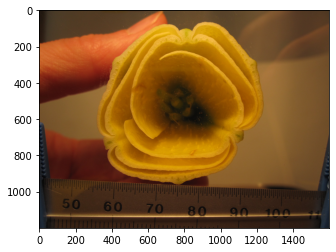

In [5]:
lily = plt.imread('/content/drive/MyDrive/testlilyslice.jpeg')
plt.imshow(lily)

Convert the lily image to grey-scale.

(-0.5, 1599.5, 1199.5, -0.5)

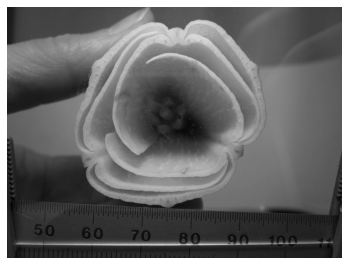

In [6]:
lily_gr = rgb2gray(lily)

fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(lily_gr, cmap = 'gray')
ax.axis('off')


Define the "binarize" function. Note: Before utilizing the binarize function, the intensity of the lily tepal must be obtained.

In [11]:
def binarize(im, turn):
  w, h = im.shape
  binary_im = np.zeros((w,h)) 
  error_code = 'Error: pixel values must be between 0 and 1'

  for a,i in enumerate(im):
    for b,j in enumerate(i):
      if j>1:
        print(error_code)
      if j<turn:
        binary_im[a,b]=1
  return binary_im

Utilize the binarize function, then plot and compare the the greyscale lily image.

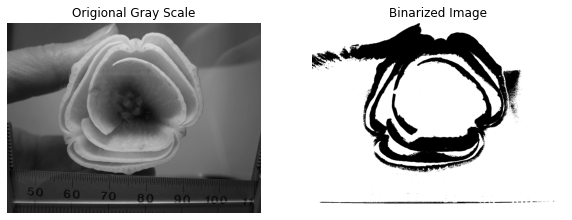

In [12]:
intensity = 0.47
lily_bi = binarize(lily_gr, intensity)
titles = ['Origional Gray Scale', 'Binarized Image']

fig, ax = plt.subplots(ncols=2, figsize=(10,6))
ax[0].imshow(lily_gr, cmap='gray')
ax[1].imshow(lily_bi, cmap='gray')

for i,axi in enumerate(ax):
  axi.axis('off')
  axi.set_title(titles[i])

Define a new function that binarizes the colored image based on a given pixel color. Note: this function keeps pixels whose rgb values are all within a range of +/- 30 of the rgb values given when the function is called. 

In [14]:
def color_binarize(im, r, g, b):
  w, h, a = im.shape
  binary_im = np.zeros((w,h)) 
  error_code = 'Error: pixel values must be between 0 and 255'

  for x,i in enumerate(im):
    for y,j in enumerate(i):
      temp_r, temp_g, temp_b = j
      if temp_r in range(r-30,r+30) and temp_g in range(g-30,g+30) and temp_b in range(b-30,b+30):
        binary_im[x,y]=0
      else:
        binary_im[x,y]=1
  return binary_im

Provide the rgb values needed, then utilize the color_binarize function. Compare to the original image and the grayscale binarized image. Note: Colorpicker in powerpoint was used to identify the rgb values of a pixel in the right-most outer tepal.

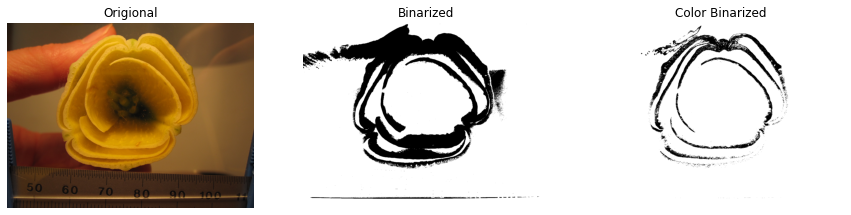

In [15]:
rgb_pixel = [215,158,43]

lily_mask = color_binarize(lily, rgb_pixel[0], rgb_pixel[1], rgb_pixel[2])

titles = ['Origional', 'Binarized', 'Color Binarized']

fig, ax = plt.subplots(ncols=3, figsize=(15,6))
ax[0].imshow(lily)
ax[1].imshow(lily_bi, cmap='gray')
ax[2].imshow(lily_mask, cmap='gray')

for i,axi in enumerate(ax):
  axi.axis('off')
  axi.set_title(titles[i])

Note on computational cost: The color_binarize function takes several minutes to run with an allowed range +/-30. This cost increases exponentially will the size of the allowed range of pixels. 